1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

X:
 [[ 2.212902    3.49855657  7.92436056]
 [ 2.1283978   2.56600349  6.82279909]
 [ 1.8417114  -0.03713708  3.64628573]
 ...
 [-0.01485387  0.92483334  0.89512561]
 [-0.49614073 -1.18312147 -2.17540293]
 [-2.58785207 -0.54801172 -5.72371587]]

Covariance matrix:
 [[ 0.93618471  1.09258937  2.96495878]
 [ 1.09258937 10.57999127 12.76517   ]
 [ 2.96495878 12.76517    18.69508756]]

Eigenvalues with eigendecomposition:
 [2.83688766e+01 1.84238691e+00 4.43023831e-16]

Eigenvectors with eigendecomposition:
 [[-0.1101858   0.56673841 -0.81649658]
 [-0.58392416 -0.7016879  -0.40824829]
 [-0.80429576  0.43178891  0.40824829]]

Eigenvalues with SVD:
 [2.83688766e+01 1.84238691e+00 3.91630516e-31]

Eigenvectors with SVD:
 [[-0.1101858  -0.56673841  0.81649658]
 [-0.58392416  0.7016879   0.40824829]
 [-0.80429576 -0.43178891 -0.40824829]]

Eigenvalues match: True
Eigenvectors match: True

Lambda:
 [[2.83688766e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.84238691e+00 0.00000000e+00]
 [0

Text(0.5, 1.0, 'New basis [x1, x2]')

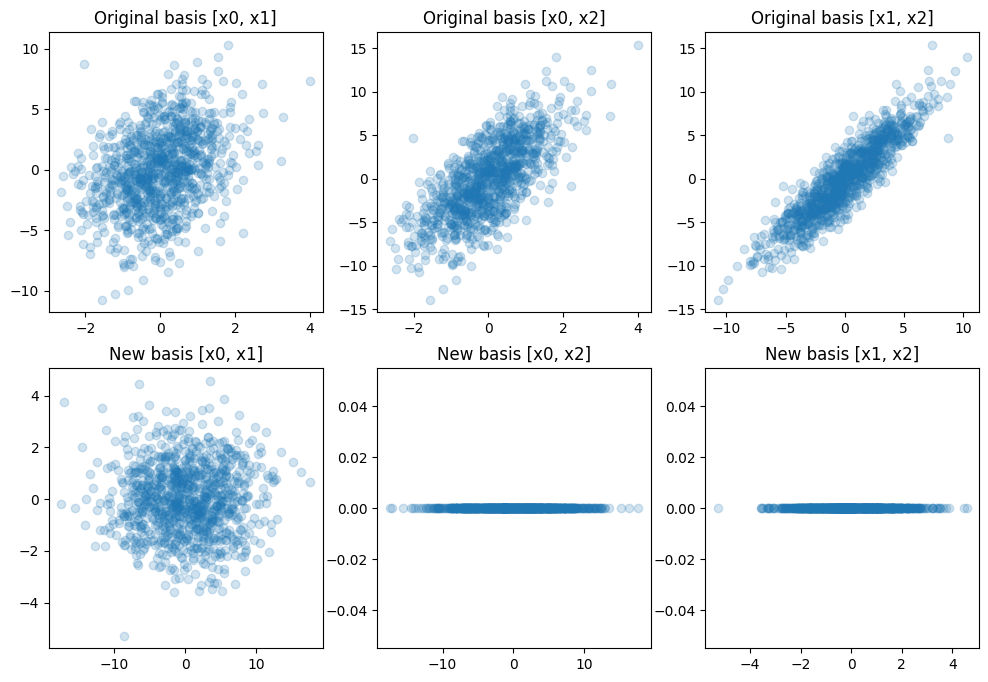

In [89]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

np.random.seed(123456789)

# Generate a dataset with 3 features
N = 1000
mu1, mu2, cov1, cov2 = 0, 0, 1, 3
x1 = np.random.normal(mu1, cov1, N)
x2 = x1 + np.random.normal(mu2, cov2, N)
x3 = 2 * x1 + x2
X = np.array([x1, x2, x3]).T
print("X:\n", X)

# Find the eigenvalues l and eigenvectors V with eigendecomposition
cov = np.cov(X, rowvar=False)
print("\nCovariance matrix:\n", cov)
l, V  = np.linalg.eig(cov)
sorted_indices = np.argsort(l)[::-1]
l = l[sorted_indices]
V = V[:, sorted_indices]
print("\nEigenvalues with eigendecomposition:\n", l)
print("\nEigenvectors with eigendecomposition:\n", V)

# Find the eigenvalues l_svd and eigenvectors Vt with SVD
U, S, Vt = np.linalg.svd(X - np.mean(X, axis=0), full_matrices=False)
l_svd = S**2 / (N-1)
sorted_indices_svd = np.argsort(l_svd)[::-1]
l_svd = l_svd[sorted_indices_svd]
Vt = Vt.T[:, sorted_indices_svd]
print("\nEigenvalues with SVD:\n", l_svd)
print("\nEigenvectors with SVD:\n", Vt)

print("\nEigenvalues match:", np.allclose(l, l_svd))
print("Eigenvectors match:", np.allclose(np.abs(V), np.abs(Vt)))

# Variability explained by principal components
Lambda = np.diag(l)
print("\nLambda:\n", Lambda)
print("\nExplained variance for each principal component:\n", Lambda/Lambda.trace()*100)
# Given how the dataset was constructed, these totally make sense, because
# the component 1 is based on the component 0, and
# the component 2 is based on the components 0 and 1.
# So the component 0 have a stronger effect on all the data.

# Reduce dimensionality to retain at least 99% variability
nb_principal_components = np.argmax(np.cumsum(l / np.sum(l)) >= 0.99) + 1
new_basis = np.copy(V)
new_basis[:, nb_principal_components:] = 0
print("\nNew basis:\n", new_basis)

# Redefine the data according to the new basis
Xp = np.dot(X, new_basis)
print("\nRedefined data\n", Xp)

# Plot the data
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].scatter(X[:, 0], X[:, 1], alpha=0.2)
axs[0, 0].set_title('Original basis [x0, x1]')
axs[0, 1].scatter(X[:, 0], X[:, 2], alpha=0.2)
axs[0, 1].set_title('Original basis [x0, x2]')
axs[0, 2].scatter(X[:, 1], X[:, 2], alpha=0.2)
axs[0, 2].set_title('Original basis [x1, x2]')

axs[1, 0].scatter(Xp[:, 0], Xp[:, 1], alpha=0.2)
axs[1, 0].set_title('New basis [x0, x1]')
axs[1, 1].scatter(Xp[:, 0], Xp[:, 2], alpha=0.2)
axs[1, 1].set_title('New basis [x0, x2]')
axs[1, 2].scatter(Xp[:, 1], Xp[:, 2], alpha=0.2)
axs[1, 2].set_title('New basis [x1, x2]')

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

New basis:
 [[-1.10185753e-01 -5.66732296e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.83923974e-01  7.01680152e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.04295480e-01 -4.31784440e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 2.12932221e-04  2.35009749e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 3.38948955e-04 -5.51139585e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

Text(0.5, 1.0, 'New basis [x1, x2]')

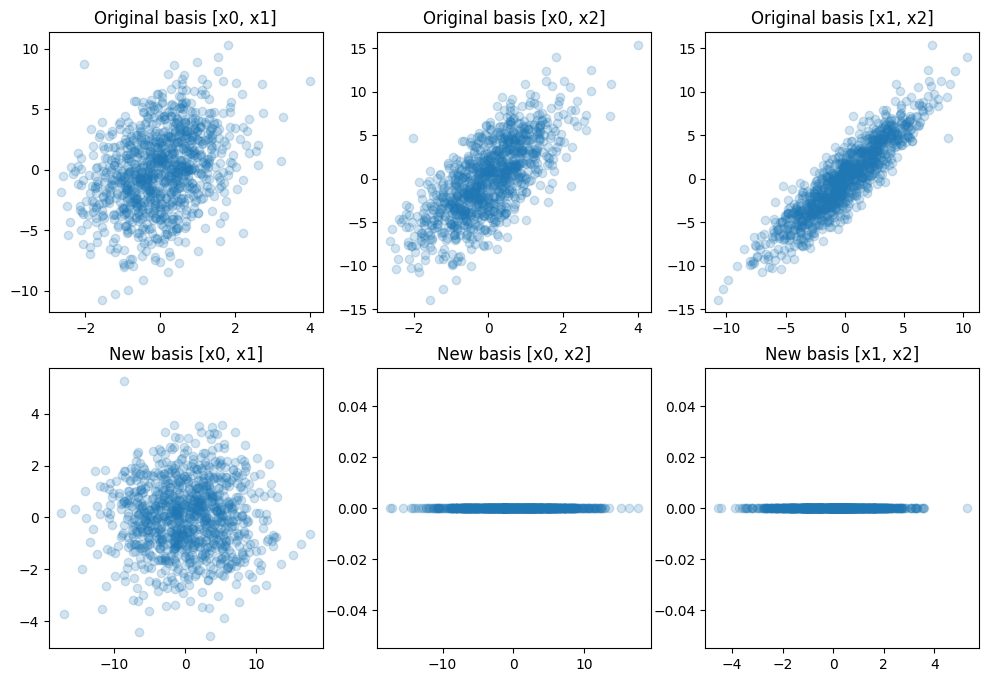

In [92]:
# Generate a dataset with 3 features
nb_noise = 10
mu_noise, cov_noise = 0, 1/20
noise = np.random.normal(mu_noise, cov_noise, size=(N, nb_noise))
X_with_noise = np.concatenate((X, noise), axis=1)

# Find the eigenvalues l and eigenvectors V with eigendecomposition
cov = np.cov(X_with_noise, rowvar=False)
#print("\nCovariance matrix:\n", cov)
l, V  = np.linalg.eig(cov)
sorted_indices = np.argsort(l)[::-1]
l = l[sorted_indices]
V = V[:, sorted_indices]
#print("\nEigenvalues with eigendecomposition:\n", l)
#print("\nEigenvectors with eigendecomposition:\n", V)

# Reduce dimensionality to retain at least 99% variability
nb_principal_components = np.argmax(np.cumsum(l / np.sum(l)) >= 0.99) + 1
new_basis = np.copy(V)
new_basis[:, nb_principal_components:] = 0
print("New basis:\n", new_basis)

# Redefine the data according to the new basis
Xp = np.dot(X_with_noise, new_basis)
print("\nRedefined data\n", Xp)

# Plot the data
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].scatter(X_with_noise[:, 0], X_with_noise[:, 1], alpha=0.2)
axs[0, 0].set_title('Original basis [x0, x1]')
axs[0, 1].scatter(X_with_noise[:, 0], X_with_noise[:, 2], alpha=0.2)
axs[0, 1].set_title('Original basis [x0, x2]')
axs[0, 2].scatter(X_with_noise[:, 1], X_with_noise[:, 2], alpha=0.2)
axs[0, 2].set_title('Original basis [x1, x2]')

axs[1, 0].scatter(Xp[:, 0], Xp[:, 1], alpha=0.2)
axs[1, 0].set_title('New basis [x0, x1]')
axs[1, 1].scatter(Xp[:, 0], Xp[:, 2], alpha=0.2)
axs[1, 1].set_title('New basis [x0, x2]')
axs[1, 2].scatter(Xp[:, 1], Xp[:, 2], alpha=0.2)
axs[1, 2].set_title('New basis [x1, x2]')

# The two figures are quite similar and we can see that all the 10 last eigenvectors have been set on 0. 
# So we can deduce that the variables that we have just added have very little effect on the data.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

New basis:
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.80700011e-01  6.93897410e-01 -5.40076835e-01  2.85130223e-01
  -5.48387919e-03 -8.83939074e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.

Text(0.5, 1.0, 'New basis [x1, x2]')

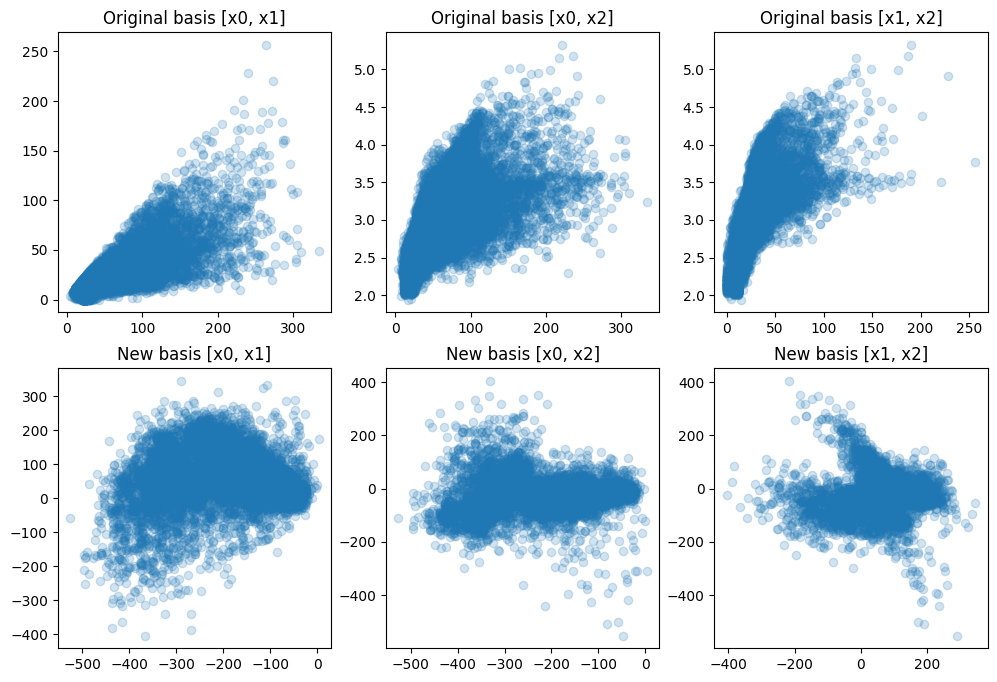

In [128]:
import pandas as pd

# Generate the dataset
column_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
dataset = np.array(pd.read_csv("data/magic04.data.txt", names=column_names).iloc[:, :-1])

# Find the eigenvalues l and eigenvectors V with eigendecomposition
cov = np.cov(dataset, rowvar=False)
#print("\nCovariance matrix:\n", cov)
l, V  = np.linalg.eig(cov)
sorted_indices = np.argsort(l)[::-1]
l = l[sorted_indices]
V = V[:, sorted_indices]
#print("\nEigenvalues with eigendecomposition:\n", l)
#print("\nEigenvectors with eigendecomposition:\n", V)

# Reduce dimensionality to retain at least 99% variability
nb_principal_components = np.argmax(np.cumsum(l / np.sum(l)) >= 0.99) + 1
new_basis = np.copy(V)
new_basis[:, nb_principal_components:] = 0
print("New basis:\n", new_basis)

# Redefine the data according to the new basis
datasetp = np.dot(dataset, new_basis)
print("\nRedefined data\n", datasetp)

# Plot the data
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].scatter(dataset[:, 0], dataset[:, 1], alpha=0.2)
axs[0, 0].set_title('Original basis [x0, x1]')
axs[0, 1].scatter(dataset[:, 0], dataset[:, 2], alpha=0.2)
axs[0, 1].set_title('Original basis [x0, x2]')
axs[0, 2].scatter(dataset[:, 1], dataset[:, 2], alpha=0.2)
axs[0, 2].set_title('Original basis [x1, x2]')

axs[1, 0].scatter(datasetp[:, 0], datasetp[:, 1], alpha=0.2)
axs[1, 0].set_title('New basis [x0, x1]')
axs[1, 1].scatter(datasetp[:, 0], datasetp[:, 2], alpha=0.2)
axs[1, 1].set_title('New basis [x0, x2]')
axs[1, 2].scatter(datasetp[:, 1], datasetp[:, 2], alpha=0.2)
axs[1, 2].set_title('New basis [x1, x2]')